In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from keras.preprocessing.image import load_img

In [10]:
base_path = './chest_xray'

In [11]:
normal_img = "IM-0115-0001.jpeg"
pneumonia_img = "person3_bacteria_12.jpeg"

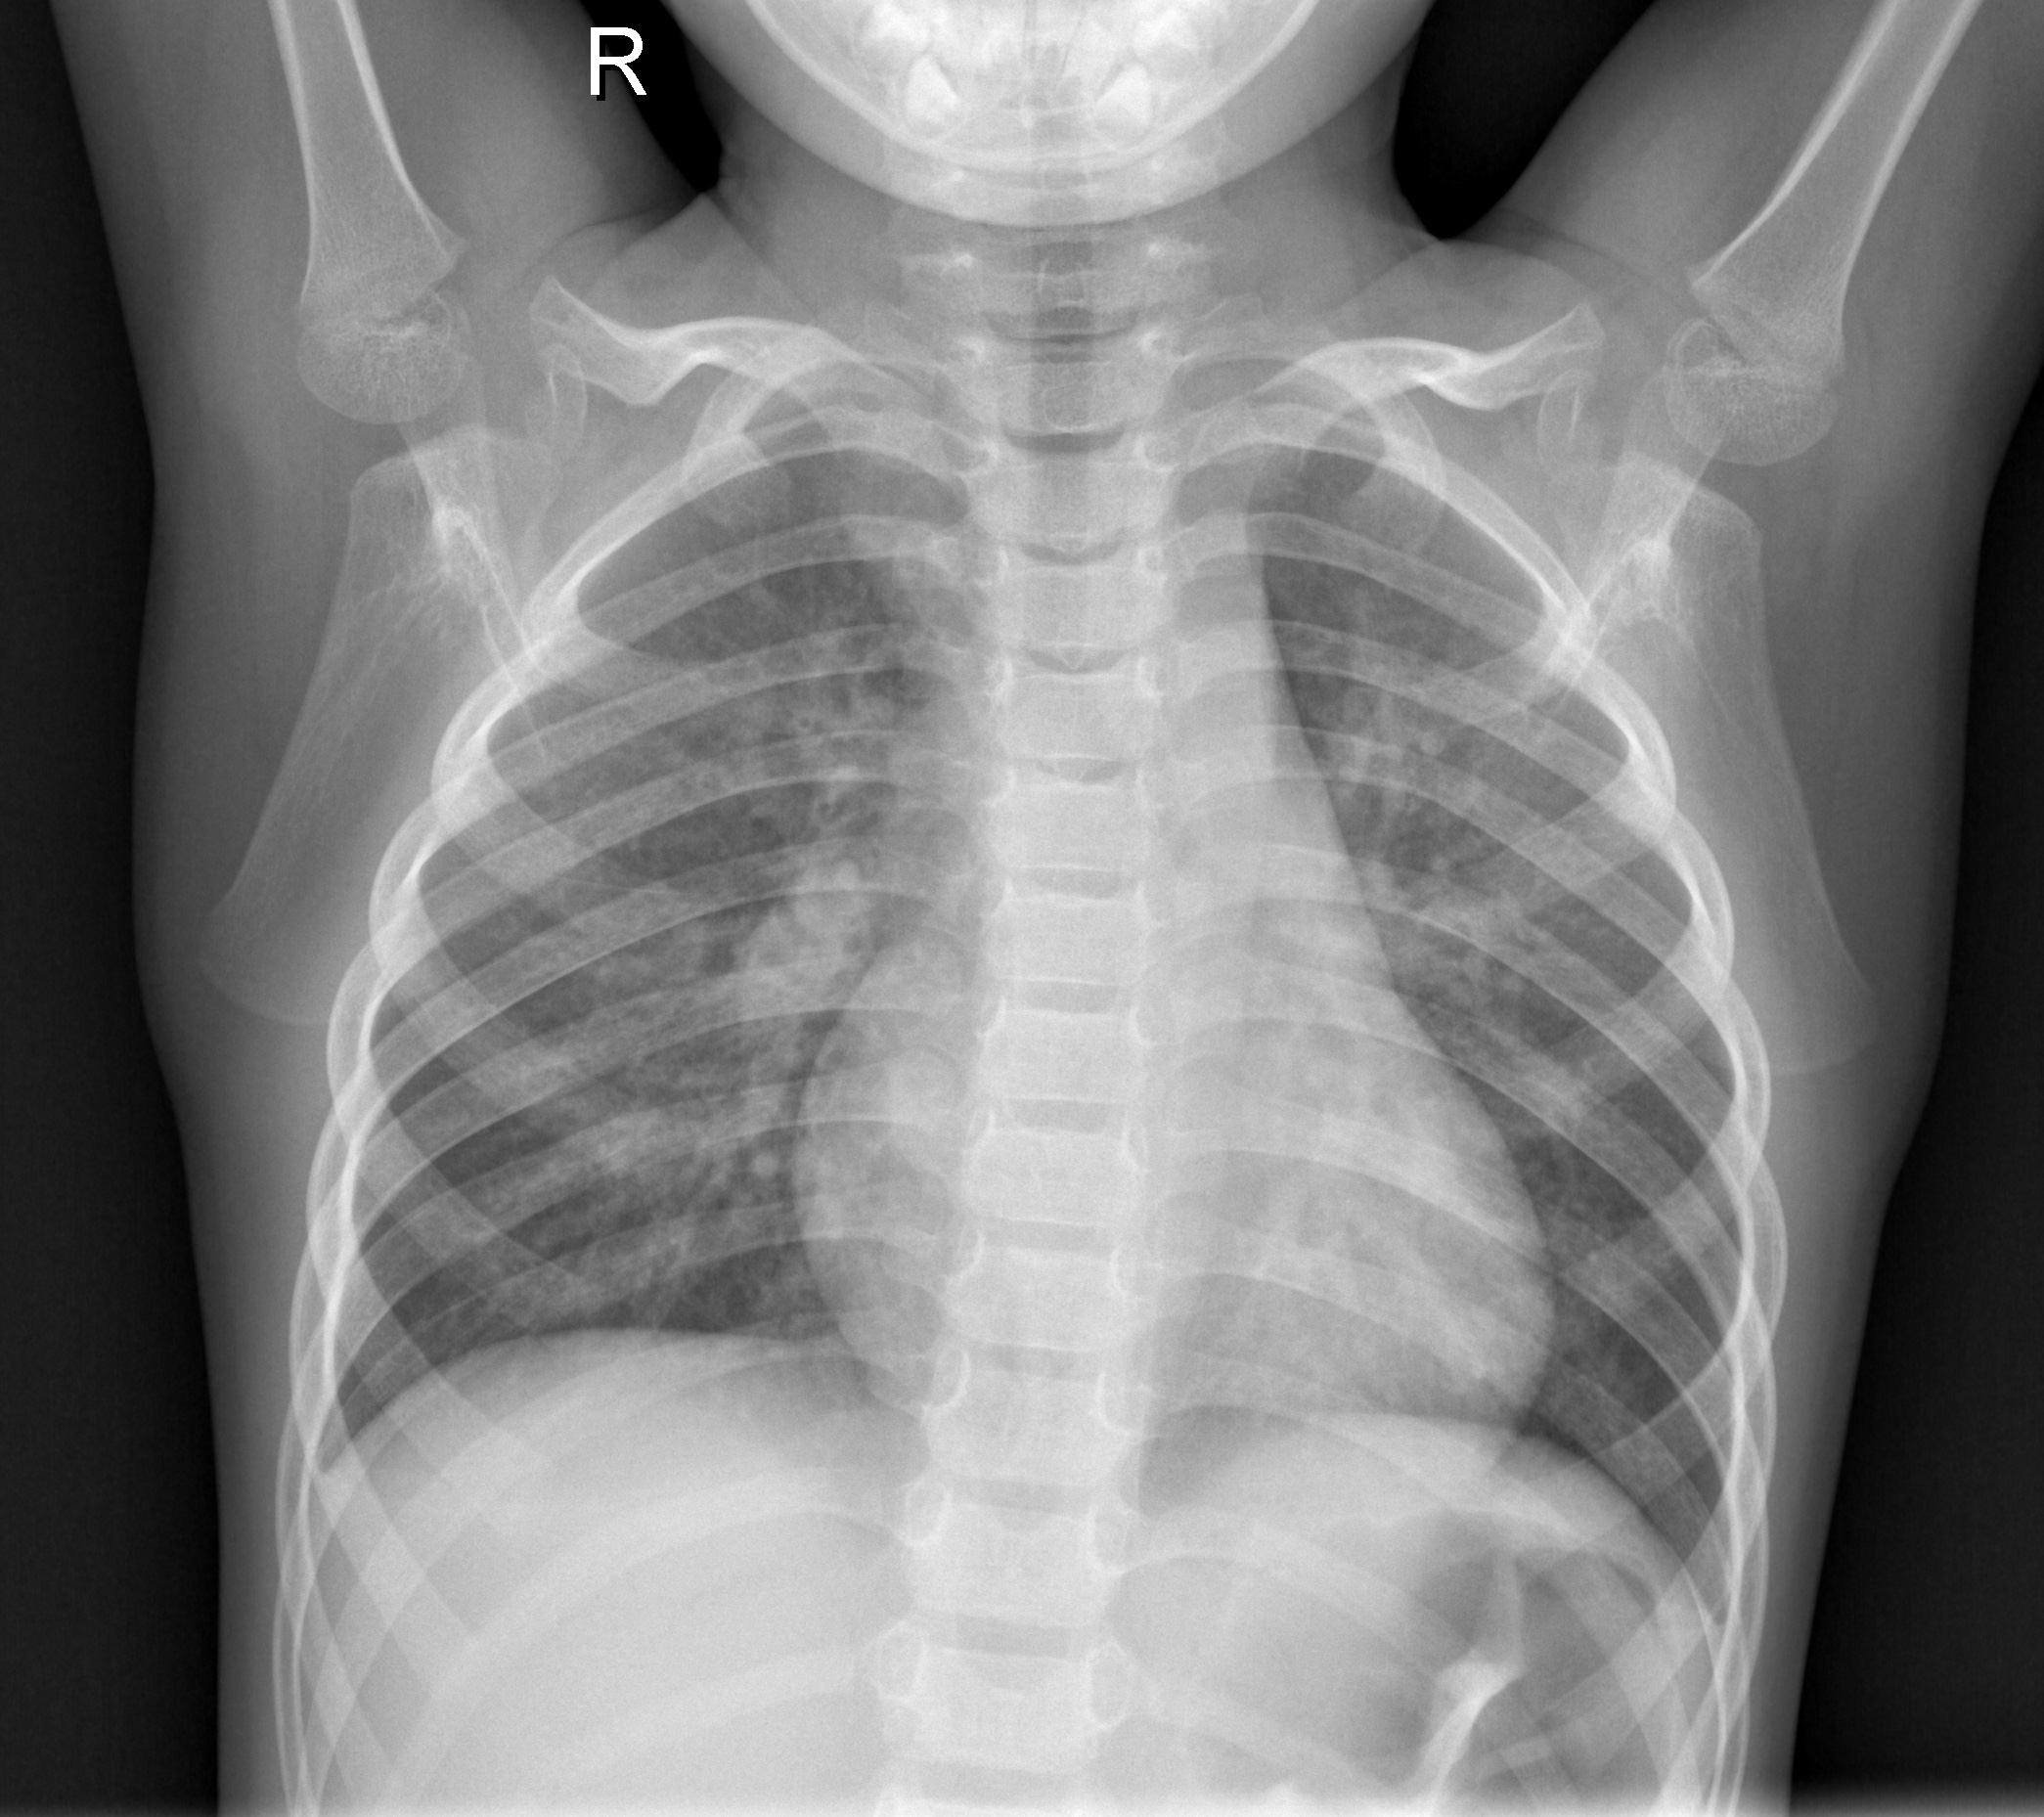

In [16]:
full_path = f"{base_path}/train/NORMAL/{normal_img}"
load_img(full_path)

In [ ]:
full_path = f"{base_path}/train/PNEUMONIA/{pneumonia_img}"
load_img(full_path)

## Prepare data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_ds = train_generator.flow_from_directory(
    f'{base_path}/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

In [ ]:
val_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
val_ds = val_generator.flow_from_directory(
    f'{base_path}/val',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

In [ ]:
test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
test_ds = test_generator.flow_from_directory(
    f'{base_path}/test',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=False
)

In [ ]:
test_generator_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

## Prepare augmented data

In [ ]:
train_generator_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
train_ds_aug = train_generator_aug.flow_from_directory(
    f'{base_path}/train',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

In [ ]:
val_generator_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_ds_aug = val_generator_aug.flow_from_directory(
    f'{base_path}/val',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

In [ ]:
test_generator_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
test_ds_aug = test_generator_aug.flow_from_directory(
    f'{base_path}/test',
    target_size=(200, 200),
    batch_size=20,
    class_mode='binary',
    shuffle=True
)

## Model without pretrained weights and dropout

In [ ]:
inputs = keras.Input(shape=(200, 200, 3))
conv = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
pool = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv)
flat = keras.layers.Flatten()(pool)
dense = keras.layers.Dense(64, activation="relu")(flat)
outputs = keras.layers.Dense(1)(dense)

In [ ]:
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

In [ ]:
histories = []
for lr in (0.2, 0.1, 0.05, 0.02, 0.01):
    optimizer = keras.optimizers.SGD(learning_rate=lr, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy()
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    print(f"with {lr}")
    hist = model.fit(train_ds, epochs=10, validation_data=val_ds)
    histories.append(hist)

In [ ]:
for i, hist in enumerate(histories):
    plt.plot(hist.history['accuracy'], label=f'History {i+1}')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
histories[4].history['accuracy']

In [ ]:
for i, hist in enumerate(histories):
    plt.plot(hist.history['loss'], label=f'History {i+1}')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
histories = []
for m in (1, 0.8, 0.6, 0.4, 0.2):
    optimizer = keras.optimizers.SGD(learning_rate=0.05, momentum=0.8)
    loss = keras.losses.BinaryCrossentropy()
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    print(f"with {m}")
    hist = model.fit(train_ds, epochs=10, validation_data=val_ds)
    histories.append(hist)

In [ ]:
for i, hist in enumerate(histories):
    plt.plot(hist.history['accuracy'], label=f'History {i+1}')

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
for i, hist in enumerate(histories):
    plt.plot(hist.history['loss'], label=f'History {i+1}')

plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.05, momentum=0.9)
loss = keras.losses.BinaryCrossentropy()
model = keras.Model(inputs, outputs)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
hist = model.fit(train_ds, epochs=6, validation_data=val_ds)
hist.history

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)

## Model without pretrained, but with multiple convolutional layers and dropout

In [13]:
inputs = keras.Input(shape=(200, 200, 3))
conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(pool1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(pool2)
pool3 = keras.layers.MaxPool2D(pool_size=(2, 2))(conv3)

flat = keras.layers.Flatten()(pool3)
dense1 = keras.layers.Dense(128, activation="relu")(flat)
dropout = keras.layers.Dropout(0.5)(dense1)
outputs = keras.layers.Dense(1, activation="sigmoid")(dropout)

In [14]:
model_with_dropout = keras.Model(inputs, outputs)

In [15]:
model_with_dropout.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,240,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,333,505 (39.42 MB)

 Trainable params: 10,333,505 (39.42 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

In [17]:
model_with_dropout.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history = model_with_dropout.fit(train_ds, epochs=10, validation_data=val_ds)

D:\projects\ml\pneumonia-prediction\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 70s 266ms/step - accuracy: 0.7853 - loss: 0.4728 - val_accuracy: 0.5625 - val_loss: 0.8176
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 68s 261ms/step - accuracy: 0.9337 - loss: 0.1800 - val_accuracy: 0.8750 - val_loss: 0.3039
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 70s 267ms/step - accuracy: 0.9610 - loss: 0.1151 - val_accuracy: 0.9375 - val_loss: 0.2461
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 70s 269ms/step - accuracy: 0.9710 - loss: 0.0815 - val_accuracy: 0.6250 - val_loss: 1.0845
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 67s 258ms/step - accuracy: 0.9702 - loss: 0.0777 - val_accuracy: 0.6875 - val_loss: 0.4777
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 66s 252ms/step - accuracy: 0.9789 - loss: 0.0556 - val_accuracy: 0.7500 - val_loss: 0.3807
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 71s 271ms/step - accuracy: 0.9777 - loss: 0.0622 - val_accuracy: 1.0000 - val_loss: 0.0363
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 70s 266ms/step - accuracy: 0.9844 - loss: 0

In [18]:
test_loss, test_accuracy = model_with_dropout.evaluate(test_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 148ms/step - accuracy: 0.5450 - loss: 3.0945


Found 5216 images belonging to 2 classes.


Found 16 images belonging to 2 classes.


Found 624 images belonging to 2 classes.


In [25]:
history = model_with_dropout.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.8765 - loss: 0.3106  

D:\projects\ml\pneumonia-prediction\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


261/261 ━━━━━━━━━━━━━━━━━━━━ 91s 347ms/step - accuracy: 0.8766 - loss: 0.3104 - val_accuracy: 0.6250 - val_loss: 0.7931
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 90s 343ms/step - accuracy: 0.9259 - loss: 0.1997 - val_accuracy: 0.5625 - val_loss: 1.4673
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 93s 357ms/step - accuracy: 0.9274 - loss: 0.1965 - val_accuracy: 0.6875 - val_loss: 0.7917
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 97s 370ms/step - accuracy: 0.9323 - loss: 0.1749 - val_accuracy: 0.6250 - val_loss: 0.7882
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 96s 369ms/step - accuracy: 0.9396 - loss: 0.1621 - val_accuracy: 0.7500 - val_loss: 0.8047
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 101s 387ms/step - accuracy: 0.9386 - loss: 0.1573 - val_accuracy: 0.6875 - val_loss: 0.5722
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 92s 353ms/step - accuracy: 0.9490 - loss: 0.1334 - val_accuracy: 0.8750 - val_loss: 0.3734
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 95s 365ms/step - accuracy: 0.9497 - loss: 0.1231 - va

In [26]:
model_with_dropout.evaluate(test_ds_aug)

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.8150 - loss: 0.4995


[0.48261064291000366, 0.8060897588729858]

### Add batch normalization to the this architecture

In [18]:
inputs = keras.Input(shape=(200, 200, 3))
conv1 = keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
bn1 = keras.layers.BatchNormalization()(conv1)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2))(bn1)

conv2 = keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(pool1)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(pool2)
pool3 = keras.layers.MaxPool2D(pool_size=(2, 2))(conv3)

flat = keras.layers.Flatten()(pool3)
dense1 = keras.layers.Dense(128, activation="relu")(flat)
dropout = keras.layers.Dropout(0.5)(dense1)
outputs = keras.layers.Dense(1, activation="sigmoid")(dropout)

In [19]:
model_dropout_bn = keras.Model(inputs, outputs)

In [20]:
model_dropout_bn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 200, 200, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 200, 200, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 80000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,240,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,333,633 (39.42 MB)

 Trainable params: 10,333,569 (39.42 MB)

 Non-trainable params: 64 (256.00 B)

In [24]:
model_dropout_bn.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
history = model_dropout_bn.fit(train_ds, epochs=10, validation_data=val_ds)

D:\projects\ml\pneumonia-prediction\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 287s 1s/step - accuracy: 0.8378 - loss: 0.4424 - val_accuracy: 0.7500 - val_loss: 0.4766
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 230s 879ms/step - accuracy: 0.9583 - loss: 0.1184 - val_accuracy: 0.8750 - val_loss: 0.4549
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 232s 888ms/step - accuracy: 0.9655 - loss: 0.0895 - val_accuracy: 1.0000 - val_loss: 0.1366
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 232s 887ms/step - accuracy: 0.9747 - loss: 0.0648 - val_accuracy: 0.9375 - val_loss: 0.2633
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 261s 885ms/step - accuracy: 0.9787 - loss: 0.0572 - val_accuracy: 1.0000 - val_loss: 0.0777
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 231s 884ms/step - accuracy: 0.9821 - loss: 0.0497 - val_accuracy: 1.0000 - val_loss: 0.0367
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 809s 3s/step - accuracy: 0.9828 - loss: 0.0433 - val_accuracy: 0.9375 - val_loss: 0.1236
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 183s 699ms/step - accuracy: 0.9916 - loss:

In [25]:
model_dropout_bn.evaluate(test_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 517ms/step - accuracy: 0.5401 - loss: 5.5308


[3.1564929485321045, 0.7419871687889099]

In [26]:
model_dropout_bn.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8932 - loss: 0.3193   

D:\projects\ml\pneumonia-prediction\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


261/261 ━━━━━━━━━━━━━━━━━━━━ 599s 2s/step - accuracy: 0.8933 - loss: 0.3190 - val_accuracy: 0.5625 - val_loss: 0.6944
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.9130 - loss: 0.2072 - val_accuracy: 0.6875 - val_loss: 0.8478
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.9201 - loss: 0.1901 - val_accuracy: 0.7500 - val_loss: 0.5012
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.9428 - loss: 0.1482 - val_accuracy: 0.8125 - val_loss: 0.4068
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 249s 952ms/step - accuracy: 0.9424 - loss: 0.1496 - val_accuracy: 0.5625 - val_loss: 1.3356
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 249s 951ms/step - accuracy: 0.9461 - loss: 0.1428 - val_accuracy: 0.6875 - val_loss: 0.8381
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 256s 982ms/step - accuracy: 0.9548 - loss: 0.1198 - val_accuracy: 0.6250 - val_loss: 1.0483
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 260s 995ms/step - accuracy: 0.9476 - loss: 0.1352 - val_acc

In [27]:
model_dropout_bn.evaluate(test_ds_aug)

D:\projects\ml\pneumonia-prediction\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 601ms/step - accuracy: 0.7837 - loss: 0.6456


[0.766444206237793, 0.7435897588729858]

## Model with pre-trained weights

In [5]:
from tensorflow.keras.applications.xception import Xception

In [25]:
base_model = Xception(
    weights='imagenet', 
    include_top=False,
    input_shape=(200, 200, 3)
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step 


In [26]:
base_model.trainable = False

In [27]:
inputs = keras.Input(shape=(200, 200, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(1, activation="sigmoid")(vectors)

model = keras.Model(inputs, outputs)

In [28]:
learning_rate = 0.02
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [29]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [43]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

D:\projects\ml\pneumonia-prediction\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 305s 1s/step - accuracy: 0.9013 - loss: 0.2954 - val_accuracy: 0.8750 - val_loss: 0.3979
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 555s 2s/step - accuracy: 0.9569 - loss: 0.1369 - val_accuracy: 0.9375 - val_loss: 0.2192
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.9744 - loss: 0.0762 - val_accuracy: 0.8125 - val_loss: 0.4646
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 10687s 41s/step - accuracy: 0.9640 - loss: 0.0986 - val_accuracy: 0.9375 - val_loss: 0.1377
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 136s 520ms/step - accuracy: 0.9700 - loss: 0.0860 - val_accuracy: 0.8750 - val_loss: 0.2364
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.9854 - loss: 0.0421 - val_accuracy: 0.7500 - val_loss: 0.5853
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 121s 464ms/step - accuracy: 0.9831 - loss: 0.0520 - val_accuracy: 0.8750 - val_loss: 0.3769
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 121s 461ms/step - accuracy: 0.9730 - loss: 0.072

In [44]:
model.evaluate(test_ds)

D:\projects\ml\pneumonia-prediction\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 423ms/step - accuracy: 0.6658 - loss: 2.8703


[1.6933834552764893, 0.7964743375778198]

In [46]:
model.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 934ms/step - accuracy: 0.9423 - loss: 0.3359  

D:\projects\ml\pneumonia-prediction\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


261/261 ━━━━━━━━━━━━━━━━━━━━ 245s 941ms/step - accuracy: 0.9423 - loss: 0.3359 - val_accuracy: 0.7500 - val_loss: 2.2694
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1287s 5s/step - accuracy: 0.9530 - loss: 0.2258 - val_accuracy: 0.7500 - val_loss: 0.6632
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.9490 - loss: 0.2307 - val_accuracy: 0.8125 - val_loss: 0.8335
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.9590 - loss: 0.1662 - val_accuracy: 0.8750 - val_loss: 0.4539
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.9554 - loss: 0.1757 - val_accuracy: 0.7500 - val_loss: 1.2533
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 337s 1s/step - accuracy: 0.9587 - loss: 0.1914 - val_accuracy: 0.7500 - val_loss: 1.8031
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 341s 1s/step - accuracy: 0.9611 - loss: 0.1654 - val_accuracy: 0.6250 - val_loss: 3.2559
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.9511 - loss: 0.2373 - val_accuracy: 0

In [47]:
model.evaluate(test_ds_aug)

D:\projects\ml\pneumonia-prediction\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 528ms/step - accuracy: 0.8053 - loss: 1.6813


[1.8722964525222778, 0.7964743375778198]

In [48]:
inputs = keras.Input(shape=(200, 200, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
dense1 = keras.layers.Dense(128, activation='relu')(vectors)
dropout = keras.layers.Dropout(0.5)(dense1)
outputs = keras.layers.Dense(1, activation='sigmoid')(dropout)

In [49]:
model_with_dropout = keras.Model(inputs, outputs)

In [50]:
learning_rate = 0.02
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
loss = keras.losses.BinaryCrossentropy()
model_with_dropout.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [51]:
model_with_dropout.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,123,881 (80.58 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [52]:
model_with_dropout.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 324s 1s/step - accuracy: 0.8699 - loss: 0.7656 - val_accuracy: 0.8750 - val_loss: 0.3824
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 1150s 4s/step - accuracy: 0.9452 - loss: 0.1628 - val_accuracy: 0.9375 - val_loss: 0.2929
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 893s 3s/step - accuracy: 0.9329 - loss: 0.1793 - val_accuracy: 0.9375 - val_loss: 0.2628
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 296s 1s/step - accuracy: 0.9230 - loss: 0.2081 - val_accuracy: 0.7500 - val_loss: 0.7574
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 313s 1s/step - accuracy: 0.9309 - loss: 0.1679 - val_accuracy: 1.0000 - val_loss: 0.3492
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 314s 1s/step - accuracy: 0.9133 - loss: 0.2166 - val_accuracy: 0.8125 - val_loss: 0.3196
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.9122 - loss: 0.1925 - val_accuracy: 0.8750 - val_loss: 0.5577
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.9363 - loss: 0.1668 - val_acc

In [53]:
model_with_dropout.evaluate(test_ds)

32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6936 - loss: 2.7254


[1.4644585847854614, 0.8237179517745972]

In [54]:
model_with_dropout.fit(train_ds_aug, epochs=10, validation_data=val_ds_aug)

Epoch 1/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 470s 2s/step - accuracy: 0.9037 - loss: 0.2420 - val_accuracy: 0.7500 - val_loss: 1.1685
Epoch 2/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 469s 2s/step - accuracy: 0.8575 - loss: 0.3341 - val_accuracy: 0.8125 - val_loss: 0.6838
Epoch 3/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 504s 2s/step - accuracy: 0.8839 - loss: 0.2627 - val_accuracy: 0.7500 - val_loss: 1.6936
Epoch 4/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 472s 2s/step - accuracy: 0.8969 - loss: 0.2284 - val_accuracy: 0.8125 - val_loss: 0.3729
Epoch 5/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 472s 2s/step - accuracy: 0.8995 - loss: 0.2427 - val_accuracy: 0.7500 - val_loss: 0.4751
Epoch 6/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 392s 1s/step - accuracy: 0.9022 - loss: 0.2520 - val_accuracy: 0.8125 - val_loss: 1.6741
Epoch 7/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 343s 1s/step - accuracy: 0.8817 - loss: 0.2713 - val_accuracy: 0.8750 - val_loss: 0.2843
Epoch 8/10
261/261 ━━━━━━━━━━━━━━━━━━━━ 394s 1s/step - accuracy: 0.8948 - loss: 0.2320 - val_accu

In [55]:
model_with_dropout.evaluate(test_ds_aug)

32/32 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.8204 - loss: 1.8557


[1.95277738571167, 0.8205128312110901]